# Column discription

# INDEX

* 1) Import Libraries
*  2) Import Dataset
* 3) Data cleaning
* 4) Visualization of data
* 5) Feature Engineering
* 6) RFM Analysis
* 7) Applying K means clustering for RFM
* 8) Agglomerative Clustering on RFM
* 9) Applying PCA for RMF
* 10) Clustering of words

# 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import sidetable as stb
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', None)
import datetime as dt
import nltk
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [2]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import joblib
from sklearn import metrics


# 2) Import Dataset

In [41]:
df = pd.read_csv("data.csv",encoding='latin1')

### Data insights 

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


#### checking for missing values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 3) Data cleaning 

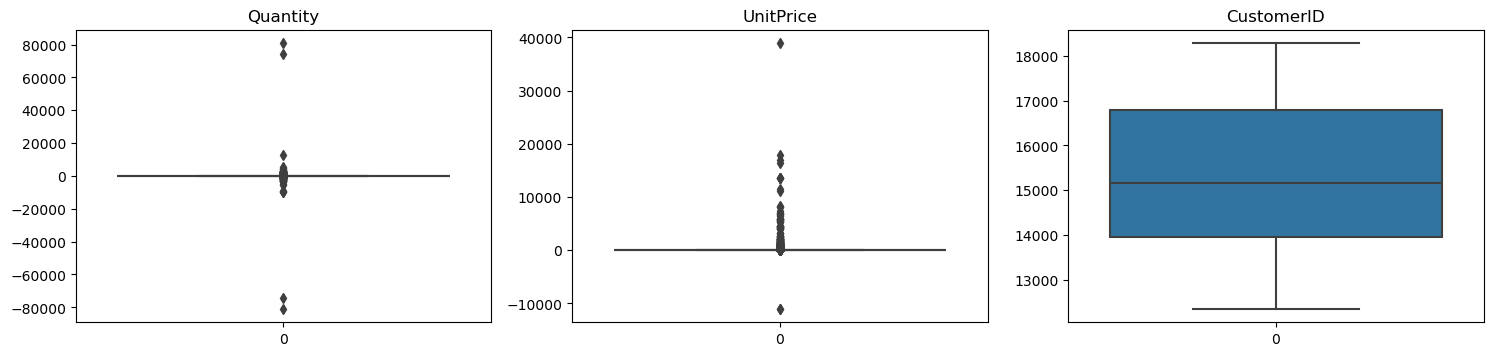

In [12]:
plt.figure(figsize=(20,20))
x=1
for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    plt.title(column)
    x +=1
plt.tight_layout()

### Converting into proper datatypes

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
# Converting InvoiceNo to a numerical data type.

df.InvoiceNo = pd.to_numeric(df.InvoiceNo, errors='coerce')

In [16]:
# Converting StockCode to a numerical data type.

df.StockCode = pd.to_numeric(df.StockCode, errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532618 non-null  float64       
 1   StockCode    487036 non-null  float64       
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 33.1+ MB


### Missing Values

In [18]:
def missing_zero_values_table(df):
        total_values = df.size
        missing_values = df.isnull().sum().sum()
        missing_percentage = (missing_values / total_values) * 100
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print(F"Total % of missing value in entire dataframe(across all cols) is = {missing_percentage}")
        print()
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 8 columns and 541909 Rows.
There are 4 columns that have missing values.
Total % of missing value in entire dataframe(across all cols) is = 4.629421175880083



,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
CustomerID,0,135080,24.9,135080,24.9,float64
StockCode,0,54873,10.1,54873,10.1,float64
InvoiceNo,0,9291,1.7,9291,1.7,float64
Description,0,1454,0.3,1454,0.3,object


#### After converting into proper datatypes see missing values have increased

In [19]:
df.isnull().sum()

InvoiceNo        9291
StockCode       54873
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df_desc = []
j=0
for name in df.columns:
    df_desc.append(
    [
        name,
        df[name].dtypes,
        df[name].isnull().sum(),
        round(df[name].isnull().sum()/len(df)*100,2),
        df[name].nunique(),
        df[name].unique(),
        #col_detail(j)
        
    ]
    )
j+=1
#,columns = ['Column','Datatype','Null','Null(%)','nunique','unique']
df_columns_desc = pd.DataFrame(df_desc, columns=['Columns','Datatype','Null','Null(%)','nunique','unique'])

In [21]:
df_columns_desc

,Columns,Datatype,Null,Null(%),nunique,unique
0,InvoiceNo,float64,9291,1.71,22061,"[536365.0, 536366.0, 536367.0, 536368.0, 53636..."
1,StockCode,float64,54873,10.13,2946,"[nan, 71053.0, 22752.0, 21730.0, 22633.0, 2263..."
2,Description,object,1454,0.27,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
3,Quantity,int64,0,0.00,722,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
4,InvoiceDate,datetime64[ns],0,0.00,23260,"[2010-12-01 08:26:00, 2010-12-01 08:28:00, 201..."
5,UnitPrice,float64,0,0.00,1630,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
6,CustomerID,float64,135080,24.93,4372,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
7,Country,object,0,0.00,38,"[United Kingdom, France, Australia, Netherland..."


### checking for distribution of data in dataset for each columns

In [184]:
#df.stb.freq(["InvoiceNo"],cum_cols=False)

In [185]:
#df.stb.freq(["StockCode"],cum_cols=False)

In [186]:
#df.stb.freq(["Description"],cum_cols=False)

In [187]:
#df.stb.freq(["Quantity"],cum_cols=False)

##### from above we observe that Quantity column has 27.8 percentage of quantity 1 data 

In [188]:
#df.stb.freq(["InvoiceDate"],cum_cols=False)

In [189]:
#df.stb.freq(["UnitPrice"],cum_cols=False)

In [190]:
#df.stb.freq(["CustomerID"],cum_cols=False)

In [29]:
df.stb.freq(["Country"],cum_cols=False)

,Country,count,percent
0,United Kingdom,495478,91.431956
1,Germany,9495,1.752139
2,France,8557,1.579047
3,EIRE,8196,1.512431
4,Spain,2533,0.467422
5,Netherlands,2371,0.437527
6,Belgium,2069,0.381798
7,Switzerland,2002,0.369435
8,Portugal,1519,0.280305
9,Australia,1259,0.232327


##### From above country column we observe that most of the distribution i.e 91.431956 is from United Kingdom

### Imputing missing values

In [30]:
df["InvoiceNo"]=df["InvoiceNo"].fillna(df["InvoiceNo"].median)
df.isnull().sum()


InvoiceNo           0
StockCode       54873
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
df["StockCode"]=df["StockCode"].fillna(df["StockCode"].median)
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
df["Description"]=df["Description"].fillna(df["Description"].mode)
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
df["CustomerID"]=df["CustomerID"].fillna(df["CustomerID"].median)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### No missing values..

In [34]:
df[df["UnitPrice"]==0].count()

InvoiceNo      2515
StockCode      2515
Description    2515
Quantity       2515
InvoiceDate    2515
UnitPrice      2515
CustomerID     2515
Country        2515
dtype: int64

In [35]:
df[df["UnitPrice"] < 0].count()

InvoiceNo      2
StockCode      2
Description    2
Quantity       2
InvoiceDate    2
UnitPrice      2
CustomerID     2
Country        2
dtype: int64

In [36]:
df[df["Quantity"]==0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [37]:
df[df["Quantity"] < 0].count()

InvoiceNo      10624
StockCode      10624
Description    10624
Quantity       10624
InvoiceDate    10624
UnitPrice      10624
CustomerID     10624
Country        10624
dtype: int64

# 4) Visualization of data

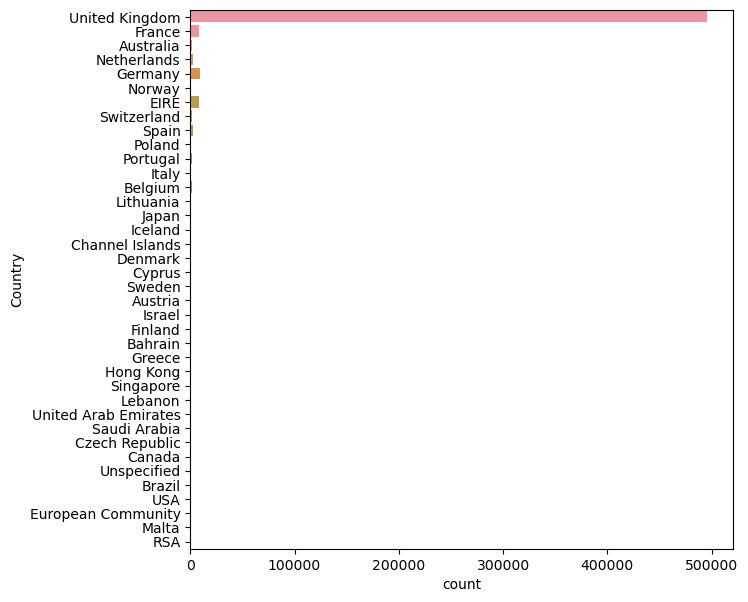

In [38]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, y='Country')
plt.show()

In [41]:
#df[['InvoiceNo', 'Country']].plot.scatter(x = 'InvoiceNo',y='Country', color = 'green')

In [42]:
#sns.scatterplot(data=df, x="InvoiceNo", y="Country",color = 'green')

# 5) Feature Engineering

### Customers and products

In [42]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


#### Order canceled column = where "C" in InvoiceNo there is order cancled

In [43]:
col = df.loc[:,['InvoiceNo']]
col[230:250]

,InvoiceNo
230,536390
231,536390
232,536390
233,536390
234,536390
235,C536391
236,C536391
237,C536391
238,C536391
239,C536391


In [44]:
col['order_canceled'] = col['InvoiceNo'].apply(lambda x:int('C' in x))
display(col[230:250])

,InvoiceNo,order_canceled
230,536390,0
231,536390,0
232,536390,0
233,536390,0
234,536390,0
235,C536391,1
236,C536391,1
237,C536391,1
238,C536391,1
239,C536391,1


In [45]:
n1 = col['order_canceled'].sum()
n2 = col.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


In [46]:
temp=df.groupby(["CustomerID","InvoiceNo"],as_index=False)[["InvoiceDate"]].count()

colu = temp.rename(columns = {'InvoiceDate':'Number of products'})
colu[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [47]:
colu['order_canceled'] = colu['InvoiceNo'].apply(lambda x:int('C' in x))
display(colu[:5])
#______________________________________________________________________________________________
n1 = colu['order_canceled'].sum()
n2 = colu.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


Number of orders canceled: 3654/22190 (16.47%) 


In [48]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [49]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

In [50]:
df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,0
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,0


In [51]:
df_cleaned.shape

(541909, 9)

### Stockcode

In [52]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [53]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
DOT             -> DOTCOM POSTAGE                
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
S               -> SAMPLES                       
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
DCGS0003        -> BOXED GLASS ASHTRAY           
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
DCGS0070        -> CAMOUFLAGE DOG COLLAR         
m               -> Manual                        
gift_0001_50    -> Dotcomgiftshop Gift Voucher £50.00
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0055        -> nan                           
DCGS0072        -> nan                           
DCGS0074        -> nan                           
DCGS0069        -> OOH LA LA DOGS 

#### created new column QuantityCanceled

In [54]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


#### created new column TotalPrice

In [55]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,0,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,0,-77183.6
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,8/2/2011 8:48,2.25,12347.0,Iceland,0,13.5
72263,542237,47559B,TEA TIME OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland,0,12.5
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland,0,12.5


In [56]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})


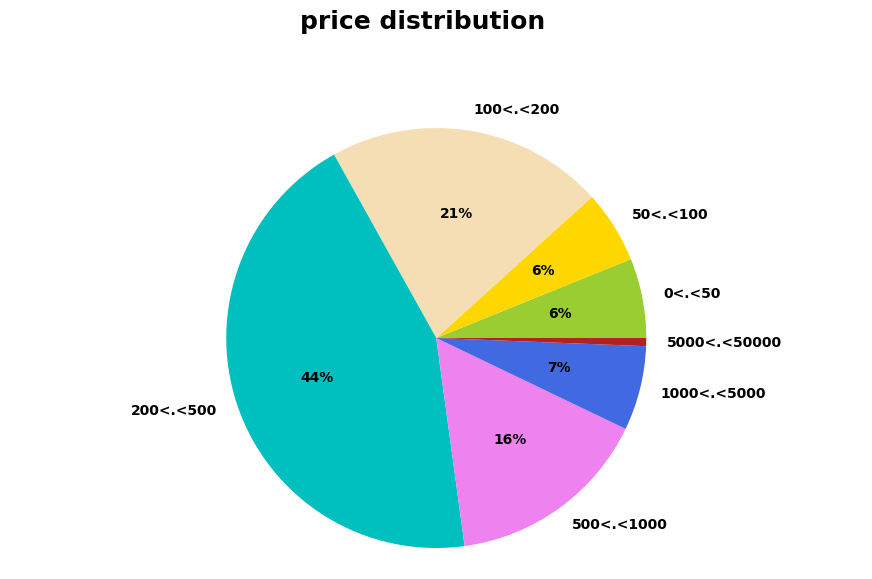

In [57]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
#____________________________________________
       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "price distribution", ha='center', fontsize = 18);

In [58]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34


# 6) RFM Analysis

#### Recency

In [59]:
df_cleaned['InvoiceDate'].min()

'1/10/2011 10:04'

In [60]:
df_cleaned['InvoiceDate'].max()

'9/9/2011 9:52'

In [61]:
# I'll just fix the date to be one day after the last entry in the databse

NOW = dt.datetime(2011,12,10)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [62]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"


rfmTable = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [63]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable['Recency'] = rfmTable['Recency'].dt.days

In [64]:
rfmTable.head(5)

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850.0,139.12,373
536366,2010-12-01 08:28:00,17850.0,22.20,373
536367,2010-12-01 08:34:00,13047.0,278.73,373
536368,2010-12-01 08:34:00,13047.0,70.05,373
536369,2010-12-01 08:35:00,13047.0,17.85,373


In [65]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [66]:
rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

In [67]:
rfmTable_final.head(5)

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,325,325,2,0.00
12347.0,2,367,7,4310.00
12348.0,75,358,4,1797.24
12349.0,18,18,1,1757.55
12350.0,310,310,1,334.40


In [68]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [69]:
segmented_rfm = rfmTable_final

In [70]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [71]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346.0,325,325,2,0.00,4,3,4
12347.0,2,367,7,4310.00,1,1,1
12348.0,75,358,4,1797.24,3,2,1
12349.0,18,18,1,1757.55,2,4,1
12350.0,310,310,1,334.40,4,4,3


In [72]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,325,2,0.00,4,3,4,434
12347.0,2,367,7,4310.00,1,1,1,111
12348.0,75,358,4,1797.24,3,2,1,321
12349.0,18,18,1,1757.55,2,4,1,241
12350.0,310,310,1,334.40,4,4,3,443


In [73]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False)

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646.0,1,354,77,279489.02,1,1,1,111
18102.0,0,367,62,256438.49,1,1,1,111
17450.0,8,367,55,187482.17,1,1,1,111
14911.0,1,373,248,132572.62,1,1,1,111
14156.0,9,372,66,113384.14,1,1,1,111
17511.0,2,373,46,88125.38,1,1,1,111
16684.0,4,358,31,65892.08,1,1,1,111
13694.0,3,373,60,62653.10,1,1,1,111
15311.0,0,373,118,59419.34,1,1,1,111


In [74]:
segmented_rfm = segmented_rfm.reset_index()

In [75]:
segmented_rfm.head(5)

,CustomerID,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,12346.0,325,325,2,0.00,4,3,4,434
1,12347.0,2,367,7,4310.00,1,1,1,111
2,12348.0,75,358,4,1797.24,3,2,1,321
3,12349.0,18,18,1,1757.55,2,4,1,241
4,12350.0,310,310,1,334.40,4,4,3,443


In [76]:
segmented_rfm[segmented_rfm['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(10)

,CustomerID,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
3230,16721.0,262,262,1,292.47,4,4,4,444
3091,16526.0,171,171,1,290.36,4,4,4,444
3771,17464.0,158,158,1,289.96,4,4,4,444
2793,16125.0,367,367,1,289.35,4,4,4,444
1635,14549.0,311,311,1,289.24,4,4,4,444
825,13439.0,255,255,1,283.71,4,4,4,444
3615,17251.0,362,362,1,283.28,4,4,4,444
4140,17968.0,373,373,1,277.35,4,4,4,444
1083,13803.0,255,255,1,277.07,4,4,4,444
3235,16727.0,364,364,1,272.82,4,4,4,444


In [77]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFMScore']=='444']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['f_quartile']==4]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['m_quartile']==4]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFMScore']=='244']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='111']))

Best Customers:  402
Loyal Customers:  1313
Big Spenders:  1093
Almost Lost:  136
Lost Customers:  50
Lost Cheap Customers:  484


# 7) Applying K means clustering for RFM 

In [78]:
rfm_data = segmented_rfm.drop(['r_quartile','f_quartile','m_quartile','RFMScore'],axis=1)
rfm_data.head()

,CustomerID,min_recency,max_recency,frequency,monetary_value
0,12346.0,325,325,2,0.00
1,12347.0,2,367,7,4310.00
2,12348.0,75,358,4,1797.24
3,12349.0,18,18,1,1757.55
4,12350.0,310,310,1,334.40


In [79]:
rfm_data.index = rfm_data['CustomerID']

In [80]:
rfm_data = rfm_data.drop('CustomerID', axis=1, inplace=False)

In [81]:
rfm_data.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,325,325,2,0.00
12347.0,2,367,7,4310.00
12348.0,75,358,4,1797.24
12349.0,18,18,1,1757.55
12350.0,310,310,1,334.40


In [82]:
#instead of removing outliers, we can powertransform the data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [83]:
features = rfm_data.columns

In [84]:
rfm_data_pt = pd.DataFrame(pt.fit_transform(rfm_data), columns=features, index=rfm_data.index)

In [85]:
rfm_data_pt.describe()

,min_recency,max_recency,frequency,monetary_value
count,4.372000e+03,4.372000e+03,4.372000e+03,4.372000e+03
mean,-1.755229e-16,4.875636e-17,4.875636e-18,-9.751273e-18
std,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,-2.183023e+00,-1.974456e+00,-1.227628e+00,-2.707992e+01
25%,-7.396007e-01,-9.149057e-01,-1.227628e+00,-2.787900e-01
50%,1.188276e-02,2.493940e-01,1.473469e-01,-1.759487e-01
75%,8.481018e-01,8.881516e-01,7.103998e-01,5.389160e-02
max,1.743707e+00,1.228109e+00,2.437110e+00,2.420826e+01


In [86]:
from sklearn.cluster import KMeans


### Elbow method for finding optimal values of clusters

In [87]:
#elbow method

cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [88]:
df_elbow

,No_cluster,WCSS_errors
0,2,11693.284244
1,3,8500.287277
2,4,6684.565465
3,5,5710.734715
4,6,4965.615788
5,7,4248.037097
6,8,3663.247735
7,9,3318.281019
8,10,3029.149873
9,11,2810.650193


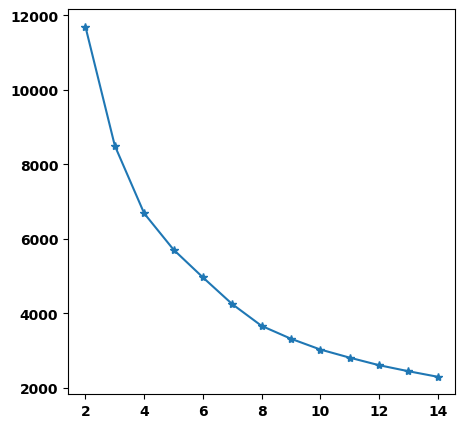

In [89]:
plt.figure(figsize=(5,5))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
#silhouette_score

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(rfm_data_pt, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [92]:
df_sil
#we can consider n=4, silhouette_score is high for n=4

,No_cluster,Silhouette_score
0,2,0.358148
1,3,0.395528
2,4,0.406657
3,5,0.354426
4,6,0.355665
5,7,0.356879
6,8,0.358932
7,9,0.330458
8,10,0.307951
9,11,0.309223


In [93]:
#Clustering

kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_data_pt)

labels = kmeans.labels_

In [94]:
rfm_data_pt['K_labels'] = labels

In [95]:
rfm_data_pt.head(10)

,min_recency,max_recency,frequency,monetary_value,K_labels
CustomerID,,,,,
12346.0,1.606608,0.839376,-0.350559,-0.399050,3
12347.0,-1.696240,1.179694,1.030041,0.572500,2
12348.0,0.317615,1.106981,0.475176,0.093868,2
12349.0,-0.669146,-1.790511,-1.227628,0.085397,1
12350.0,1.560253,0.717193,-1.227628,-0.265842,3
12352.0,-0.220856,0.602827,1.391505,0.039354,2
12353.0,1.164358,-0.157950,-1.227628,-0.351905,3
12354.0,1.283290,0.075474,-1.227628,-0.067306,3
12355.0,1.208330,-0.074371,-1.227628,-0.228397,3


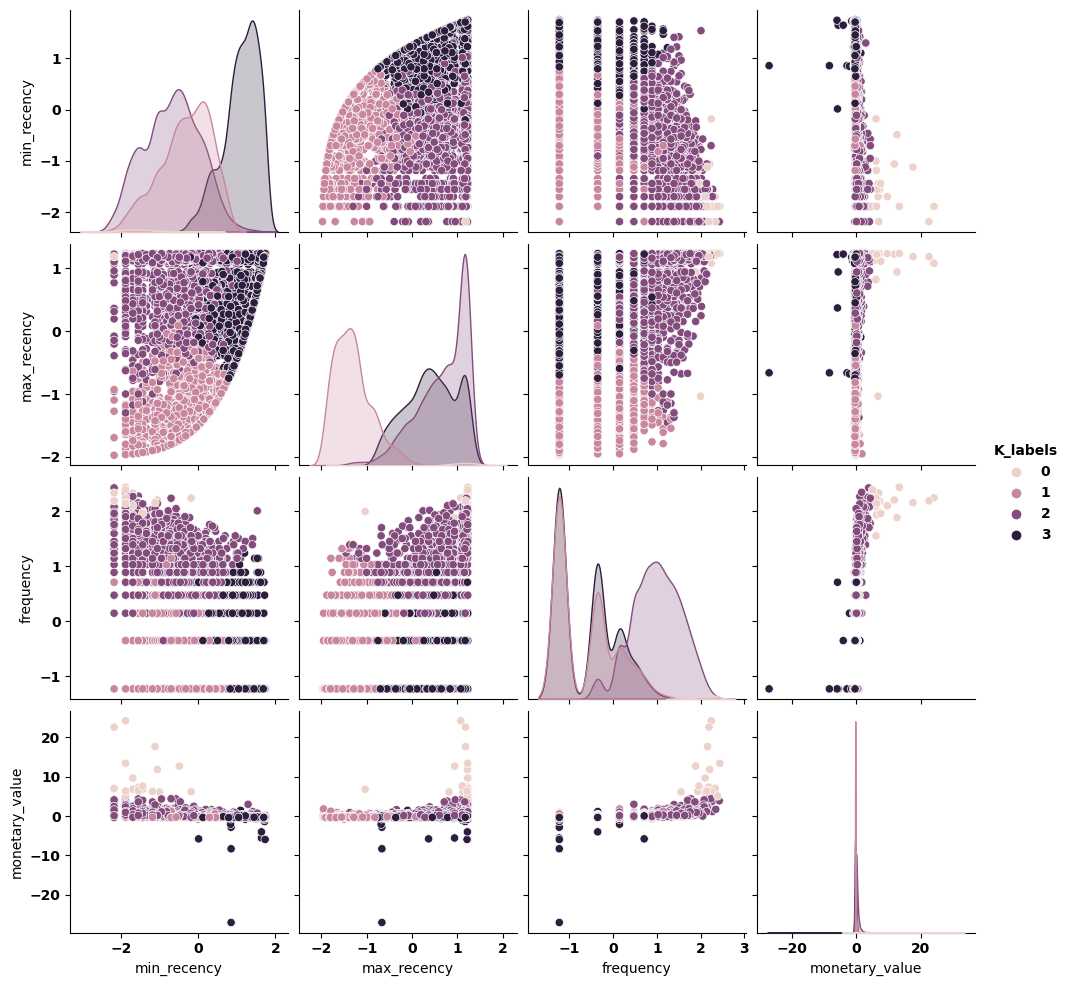

In [96]:
sns.pairplot(rfm_data_pt, hue='K_labels')

<Axes: xlabel='K_labels', ylabel='count'>

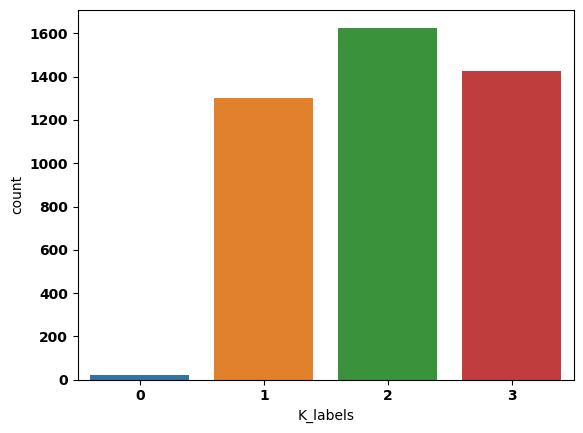

In [97]:
sns.countplot(rfm_data_pt, x="K_labels")

# 8) Agglomerative Clustering on RFM

In [98]:
X = rfm_data_pt.iloc[:, 0:4]
X.head()


,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,1.606608,0.839376,-0.350559,-0.399050
12347.0,-1.696240,1.179694,1.030041,0.572500
12348.0,0.317615,1.106981,0.475176,0.093868
12349.0,-0.669146,-1.790511,-1.227628,0.085397
12350.0,1.560253,0.717193,-1.227628,-0.265842


In [99]:
from sklearn.cluster import AgglomerativeClustering 

In [100]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')

model2.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [101]:
rfm_data_pt['Aglo_Labels'] = model2.labels_

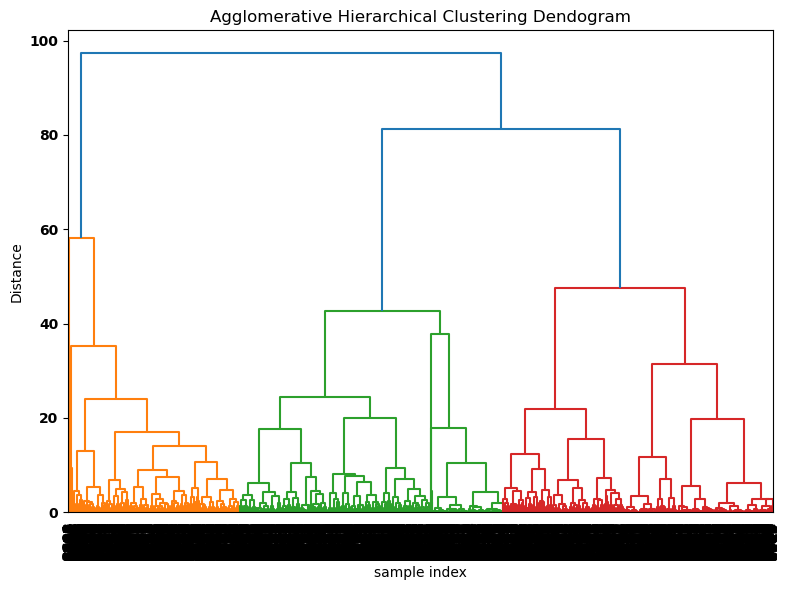

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(8,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

<Axes: xlabel='Aglo_Labels', ylabel='count'>

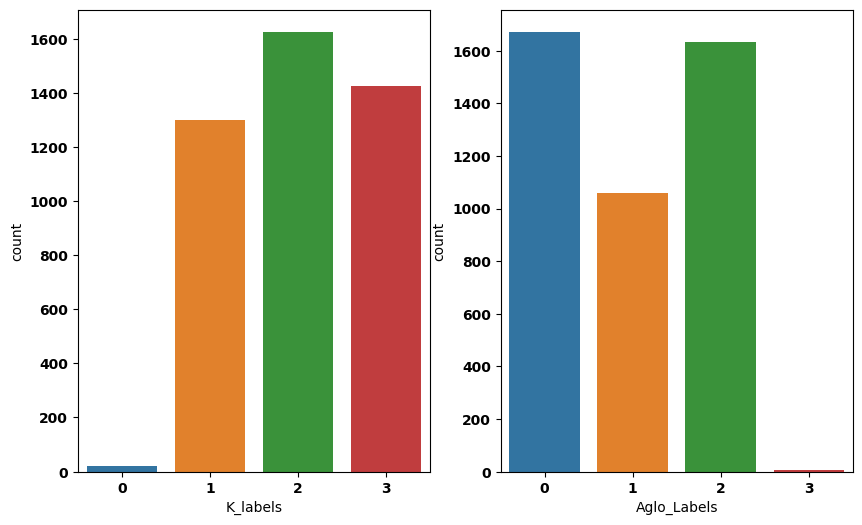

In [103]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(data=rfm_data_pt, x="K_labels", ax=ax[0])
sns.countplot(data=rfm_data_pt, x="Aglo_Labels",ax=ax[1])

# 9) Applying PCA for RMF

In [104]:
from sklearn.decomposition import PCA

In [105]:
X = rfm_data_pt.iloc[:, 0:4]
X.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,1.606608,0.839376,-0.350559,-0.399050
12347.0,-1.696240,1.179694,1.030041,0.572500
12348.0,0.317615,1.106981,0.475176,0.093868
12349.0,-0.669146,-1.790511,-1.227628,0.085397
12350.0,1.560253,0.717193,-1.227628,-0.265842


In [106]:
pca = PCA()
X = pca.fit_transform(X)

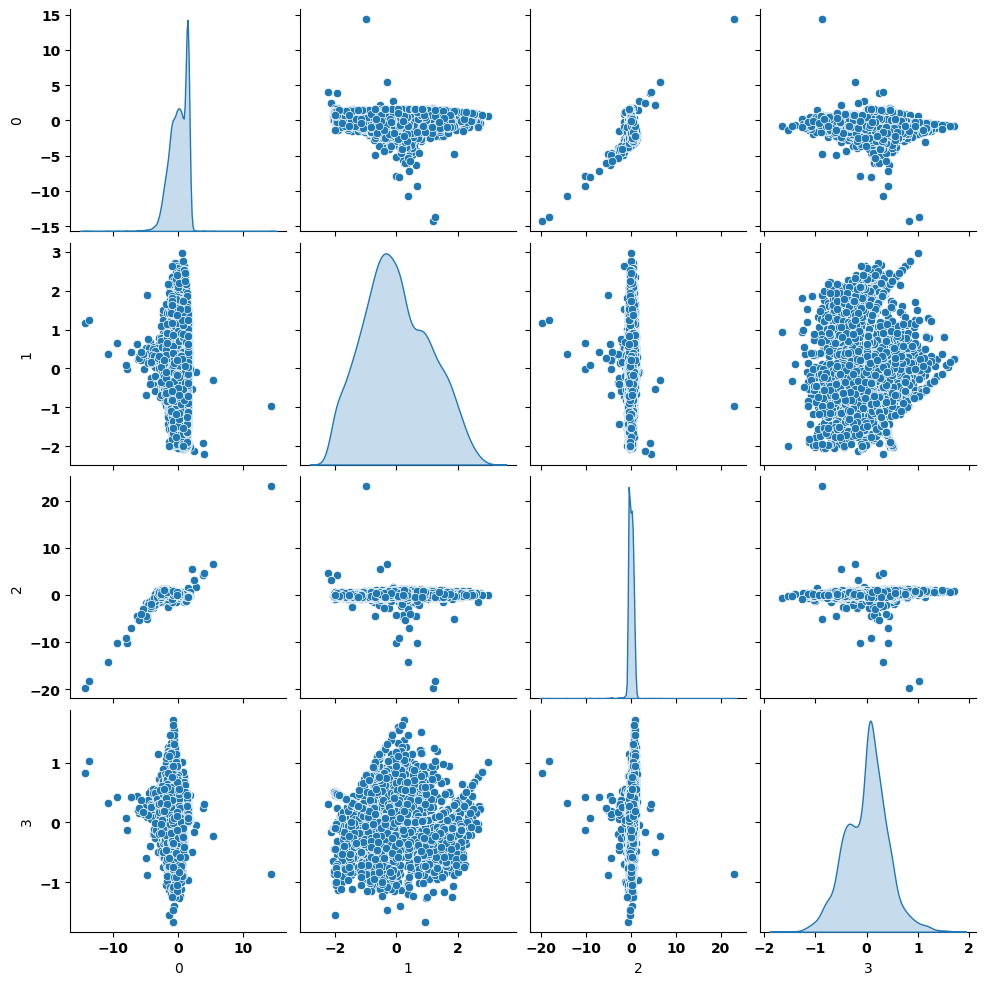

In [107]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

#### heatmap visualization for finding correlation

<Axes: >

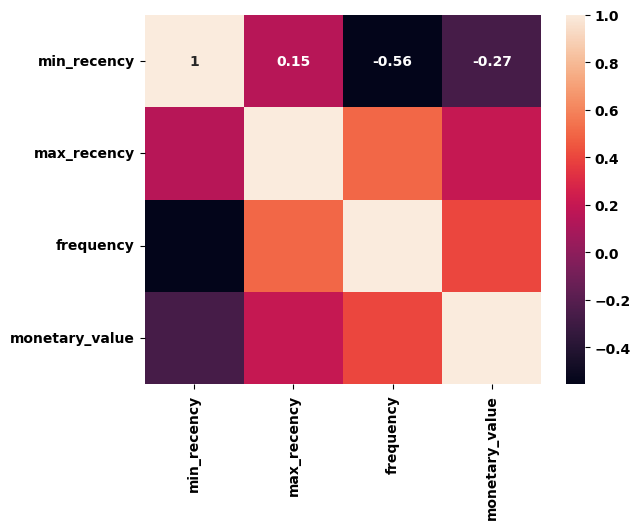

In [108]:
sns.heatmap(rfm_data_pt.iloc[:, 0:4].corr(), annot=True)

<Axes: >

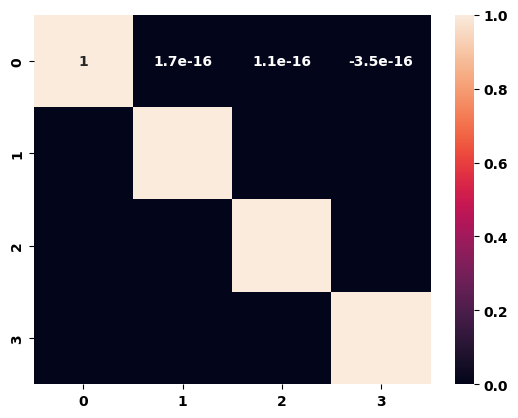

In [109]:
sns.heatmap(pd.DataFrame(X).corr(), annot=True)

In [110]:
pca_var = list(pca.explained_variance_ratio_)
pca_var

[0.49048145612488325,
 0.2871025575292655,
 0.17945168333550637,
 0.04296430301034494]

In [111]:
from itertools import accumulate

In [112]:
list(accumulate(pca_var, lambda x,y : x+y ))

#Top 2 components are giving us most of the variance, we can consider PCA=2

[0.49048145612488325,
 0.7775840136541488,
 0.9570356969896552,
 1.0000000000000002]

In [113]:
X = rfm_data_pt.iloc[:, 0:3]

pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_X, columns=['PC1', 'PC2'])

In [114]:
pca.explained_variance_ratio_

array([0.55995326, 0.38251648])

In [115]:
pca.components_

array([[-0.50964464,  0.4377183 ,  0.74071926],
       [-0.66866356, -0.74327299, -0.02084003]])

### Elbow method for finding optimal values of clusters

In [116]:
#elbow method to find out no of clusters

cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [117]:
df_elbow

,No_cluster,WCSS_errors
0,2,6938.701953
1,3,3793.027598
2,4,2922.048171
3,5,2209.293149
4,6,1882.157347
5,7,1618.861238
6,8,1397.724955
7,9,1243.909728
8,10,1113.038239
9,11,1002.972537


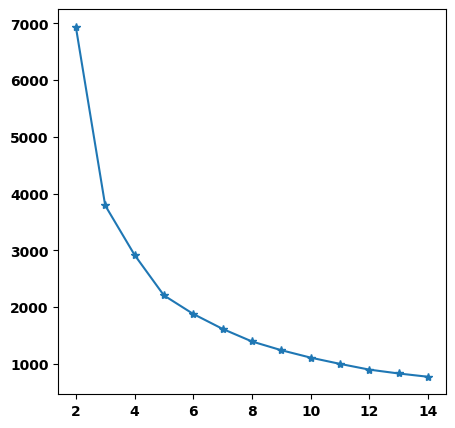

In [118]:
plt.figure(figsize=(5,5))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()

#we can consider n=3, we can recheck with sil

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
#silhouette_score

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(pca_df, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [121]:
df_sil

#we can consider n=3, silhouette_score is high for n=3

,No_cluster,Silhouette_score
0,2,0.399954
1,3,0.462857
2,4,0.413308
3,5,0.422304
4,6,0.399516
5,7,0.377895
6,8,0.386575
7,9,0.377246
8,10,0.376277
9,11,0.375688


In [122]:
#Clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

labels = kmeans.labels_

In [123]:
X1 = rfm_data_pt.iloc[:, 0:3]

X_df = pd.DataFrame(X1, columns= X1.columns)
X_df["group"] = labels

In [124]:
X_df.head()

,min_recency,max_recency,frequency,group
CustomerID,,,,
12346.0,1.606608,0.839376,-0.350559,1
12347.0,-1.696240,1.179694,1.030041,2
12348.0,0.317615,1.106981,0.475176,2
12349.0,-0.669146,-1.790511,-1.227628,0
12350.0,1.560253,0.717193,-1.227628,1


In [125]:
pca_df['K_label'] = labels

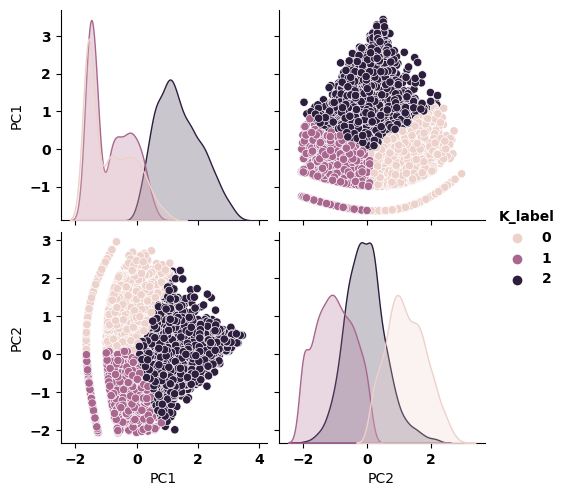

In [126]:
sns.pairplot(pca_df, hue='K_label')

In [127]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model2.fit(pca_X)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [128]:
label = model2.labels_

In [129]:
pca_df['Aglo_label'] = label

<Axes: xlabel='PC1', ylabel='PC2'>

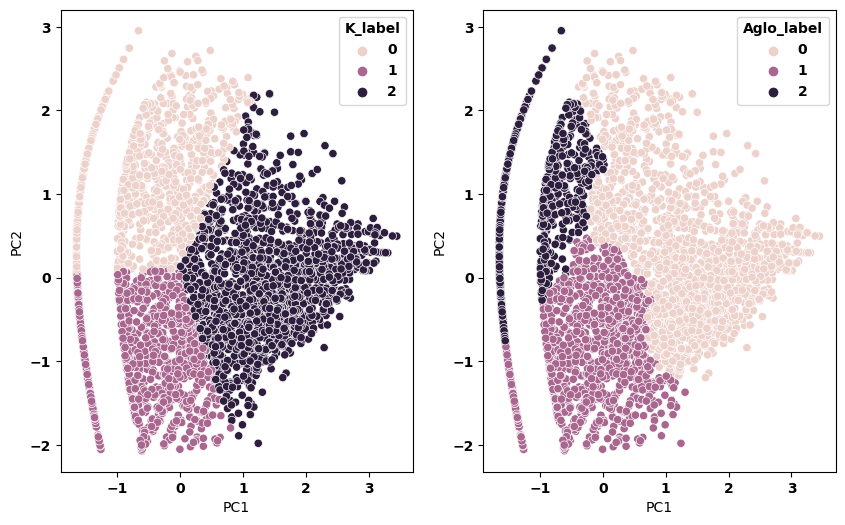

In [130]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="K_label", ax=ax[0])
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Aglo_label", ax=ax[1])

In [131]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [132]:
y = pca_df['K_label']
X = pca_df[['PC1', 'PC2']]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [134]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
y_pred_RF = rfc.predict(X_test)

In [136]:
accuracy=metrics.accuracy_score(y_test,y_pred_RF)
precision=metrics.precision_score(y_test,y_pred_RF,average="weighted")
recall = metrics.recall_score(y_test,y_pred_RF,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_RF,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9961890243902439
precision 0.9962025235667524
recall 0.9961890243902439
f1_score:1.00


<Axes: >

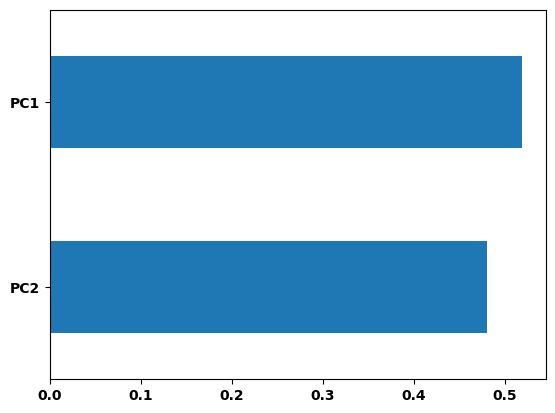

In [137]:
importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [138]:
DT= DecisionTreeClassifier()

DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
y_pred_DT = DT.predict(X_test)

In [140]:
accuracy=metrics.accuracy_score(y_test,y_pred_DT)
precision=metrics.precision_score(y_test,y_pred_DT,average="weighted")
recall = metrics.recall_score(y_test,y_pred_DT,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_DT,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9885670731707317
precision 0.9885798733311957
recall 0.9885670731707317
f1_score:0.99


In [141]:
L= LogisticRegression()

L.fit(X_train, y_train)

LogisticRegression()

In [142]:
y_pred_L = L.predict(X_test)

In [143]:
accuracy=metrics.accuracy_score(y_test,y_pred_L)
precision=metrics.precision_score(y_test,y_pred_L,average="weighted")
recall = metrics.recall_score(y_test,y_pred_L,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_L,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9939024390243902
precision 0.9939625802719553
recall 0.9939024390243902
f1_score:0.99


In [144]:
KNN= KNeighborsClassifier()

KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [145]:
y_pred_KNN = KNN.predict(X_test)

In [146]:
accuracy=metrics.accuracy_score(y_test,y_pred_KNN)
precision=metrics.precision_score(y_test,y_pred_KNN,average="weighted")
recall = metrics.recall_score(y_test,y_pred_KNN,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_KNN,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9923780487804879
precision 0.9923817931573246
recall 0.9923780487804879
f1_score:0.99


In [147]:
XG= XGBClassifier()

XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [148]:
y_pred_XG = XG.predict(X_test)

In [149]:
accuracy=metrics.accuracy_score(y_test,y_pred_XG)
precision=metrics.precision_score(y_test,y_pred_XG,average="weighted")
recall = metrics.recall_score(y_test,y_pred_XG,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_XG,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9923780487804879
precision 0.992384111429614
recall 0.9923780487804879
f1_score:0.99


In [150]:
AD= AdaBoostClassifier()

AD.fit(X_train, y_train)

AdaBoostClassifier()

In [151]:
y_pred_AD = AD.predict(X_test)

In [152]:
accuracy=metrics.accuracy_score(y_test,y_pred_AD)
precision=metrics.precision_score(y_test,y_pred_AD,average="weighted")
recall = metrics.recall_score(y_test,y_pred_AD,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_AD,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9260670731707317
precision 0.9304260521445993
recall 0.9260670731707317
f1_score:0.93


# Model 

In [153]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [154]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value',
       'r_quartile', 'f_quartile', 'm_quartile', 'RFMScore'],
      dtype='object')

In [155]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

In [156]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value',
       'RFMScore'],
      dtype='object')

In [157]:
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [158]:
df_cleaned['Month'].value_counts()

Month
11    65598
10    50695
12    44511
9     40822
5     28908
6     27836
3     27822
8     27662
7     27502
4     23198
1     21912
2     20363
Name: count, dtype: int64

In [159]:
df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].map(lambda x: x.weekday())
df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)

In [160]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,302,373,35,5288.63,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,302,373,35,5288.63,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,302,373,35,5288.63,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,302,373,35,5288.63,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,302,373,35,5288.63,411,12,2,1,8


In [161]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value', 'RFMScore',
       'Month', 'Weekday', 'Day', 'Hour'],
      dtype='object')

In [162]:
df_cleaned.shape

(406829, 19)

In [163]:
# Label encoding country col and perform classification for all the columns

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [165]:
le = LabelEncoder()
le.fit(df_cleaned['Country'])

LabelEncoder()

In [166]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [167]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [168]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,0,15.30,302,373,35,5288.63,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,302,373,35,5288.63,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,0,22.00,302,373,35,5288.63,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,302,373,35,5288.63,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,0,20.34,302,373,35,5288.63,411,12,2,1,8


In [169]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value', 'RFMScore',
       'Month', 'Weekday', 'Day', 'Hour'],
      dtype='object')

In [170]:
df_cleaned.duplicated().sum()

5225

In [171]:
df_cleaned.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
QuantityCanceled    0
TotalPrice          0
min_recency         0
max_recency         0
frequency           0
monetary_value      0
RFMScore            0
Month               0
Weekday             0
Day                 0
Hour                0
dtype: int64

In [172]:
df_cleaned["Description"].nunique()

3896

In [173]:
X= df_cleaned[[  'Quantity',
       'UnitPrice', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value', 'RFMScore',
       'Month', 'Weekday', 'Day', 'Hour'
      ]]
y = df_cleaned['CustomerID']

In [174]:
X.columns

Index(['Quantity', 'UnitPrice', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value', 'RFMScore',
       'Month', 'Weekday', 'Day', 'Hour'],
      dtype='object')

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [176]:
X_train.head()

,Quantity,UnitPrice,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
323538,2,0.39,35,0,0.78,21,198,3,617.99,233,11,4,18,12
279779,12,1.25,35,0,15.00,10,264,7,2606.53,111,6,1,21,13
279705,12,0.85,35,0,10.20,65,264,9,1680.76,311,6,2,15,13
380045,1,2.95,35,0,2.95,11,63,3,911.15,132,10,3,13,13
164542,6,2.10,35,0,12.60,75,358,2,602.51,333,9,6,25,15


In [177]:

num_columns = ['Quantity', 'UnitPrice', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value', 'RFMScore',
       'Month', 'Weekday', 'Day', 'Hour']

In [178]:
#categorical_pipeline = Pipeline([
#    ("encoder",OneHotEncoder())
#])

numerical_pipeline = Pipeline([
    ("scaler",RobustScaler())
])

preprocessor = ColumnTransformer([
    #("cat",categorical_pipeline,cat_columns),
    ("numerical",numerical_pipeline,num_columns)
])

pipe_L = Pipeline([
    ("1st step",preprocessor),
    ("algo log",LogisticRegression())
])

pipe_KNN = Pipeline([
    ("algo prep",preprocessor),
    ("algo",KNeighborsClassifier())
])

pipe_XG = Pipeline([
    ("algo prep",preprocessor),
    ("algo",XGBClassifier())
])

pipe_DT = Pipeline([
    ("algo prep",preprocessor),
    ("algo",DecisionTreeClassifier())


  
])


In [179]:
pipe_DT.fit(X_train,y_train)

Pipeline(steps=[('algo prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Quantity', 'UnitPrice',
                                                   'Country',
                                                   'QuantityCanceled',
                                                   'TotalPrice', 'min_recency',
                                                   'max_recency', 'frequency',
                                                   'monetary_value', 'RFMScore',
                                                   'Month', 'Weekday', 'Day',
                                                   'Hour'])])),
                ('algo', DecisionTreeClassifier())])

In [180]:
y_pred_DT_base = pipe_DT.predict(X_test)

In [181]:
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [182]:
accuracy=metrics.accuracy_score(y_test,y_pred_DT_base)
precision=metrics.precision_score(y_test,y_pred_DT_base,average="weighted")
recall = metrics.recall_score(y_test,y_pred_DT_base,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_DT_base,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.9987955657154094
precision 0.9988013516785461
recall 0.9987955657154094
f1_score:1.00


In [183]:
pipe_KNN.fit(X_train,y_train)

Pipeline(steps=[('algo prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Quantity', 'UnitPrice',
                                                   'Country',
                                                   'QuantityCanceled',
                                                   'TotalPrice', 'min_recency',
                                                   'max_recency', 'frequency',
                                                   'monetary_value', 'RFMScore',
                                                   'Month', 'Weekday', 'Day',
                                                   'Hour'])])),
                ('algo', KNeighborsClassifier())])

In [182]:
y_pred_KNN_base = pipe_KNN.predict(X_test)

In [183]:
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [184]:
accuracy=metrics.accuracy_score(y_test,y_pred_KNN_base)
precision=metrics.precision_score(y_test,y_pred_KNN_base,average="weighted")
recall = metrics.recall_score(y_test,y_pred_KNN_base,average="weighted")
f1_score=metrics.f1_score(y_test,y_pred_KNN_base,average="weighted")

print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print(f"f1_score:{f1_score:.2f}")

accuracy 0.7850453506378585
precision 0.7963787854978801
recall 0.7850453506378585
f1_score:0.78


In [192]:
#pipe_XG.fit(X_train,y_train)

# 10) Clustering of words

# --------->

In [193]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [195]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

In [196]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'Description': 1603


In [197]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

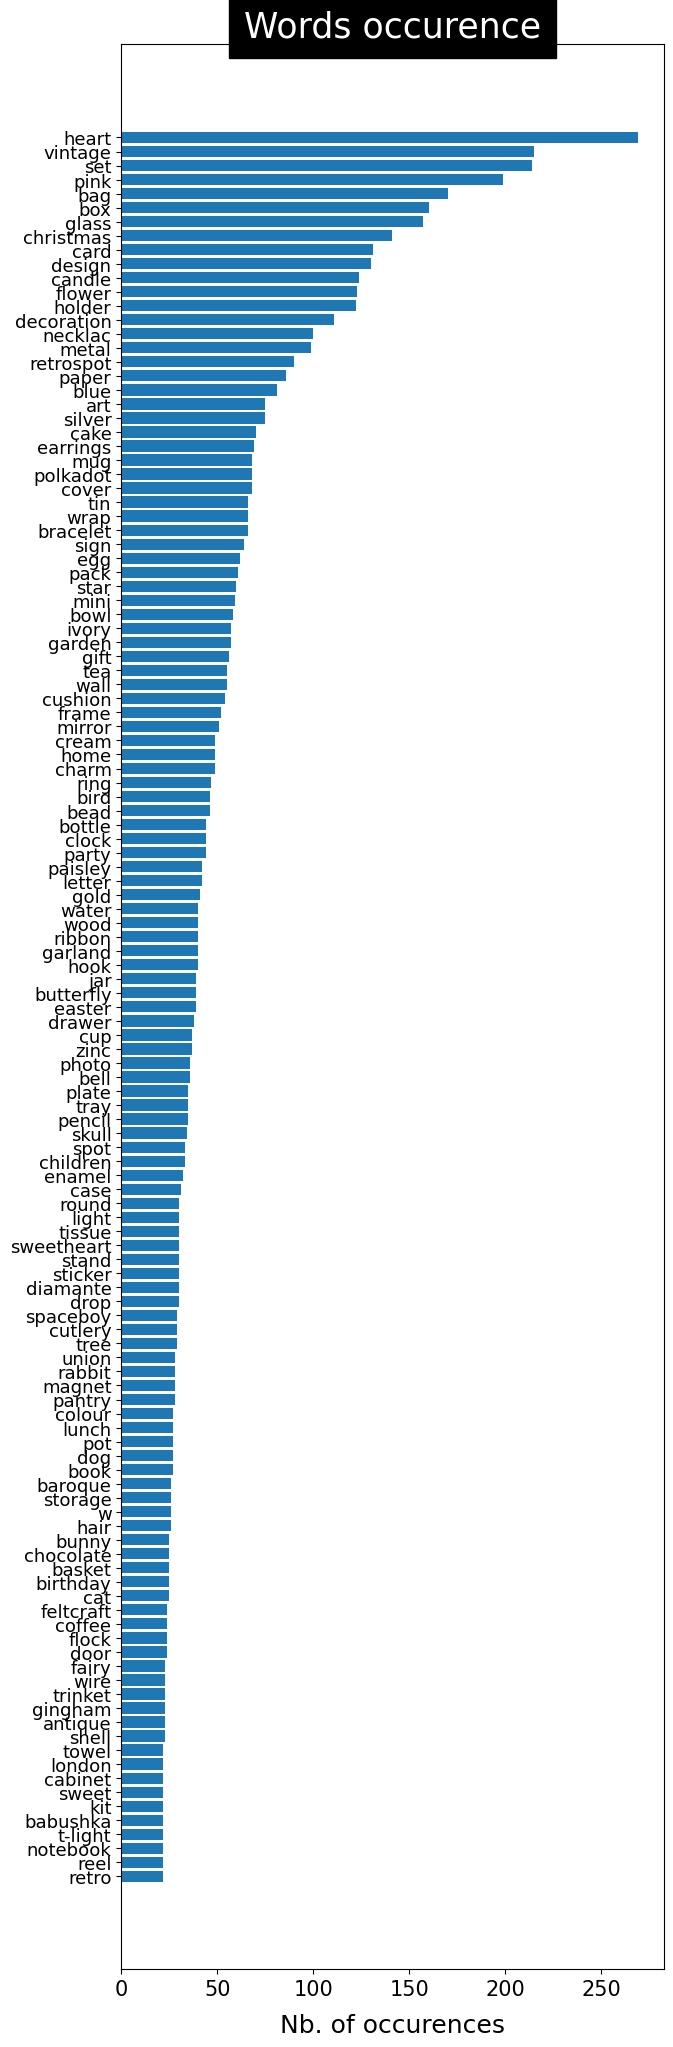

In [198]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [199]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import random 
from sklearn.preprocessing import Normalizer

from wordcloud import WordCloud, STOPWORDS

In [200]:
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3896, 1705) of float64


In [201]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3896, 100) of float64


In [202]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

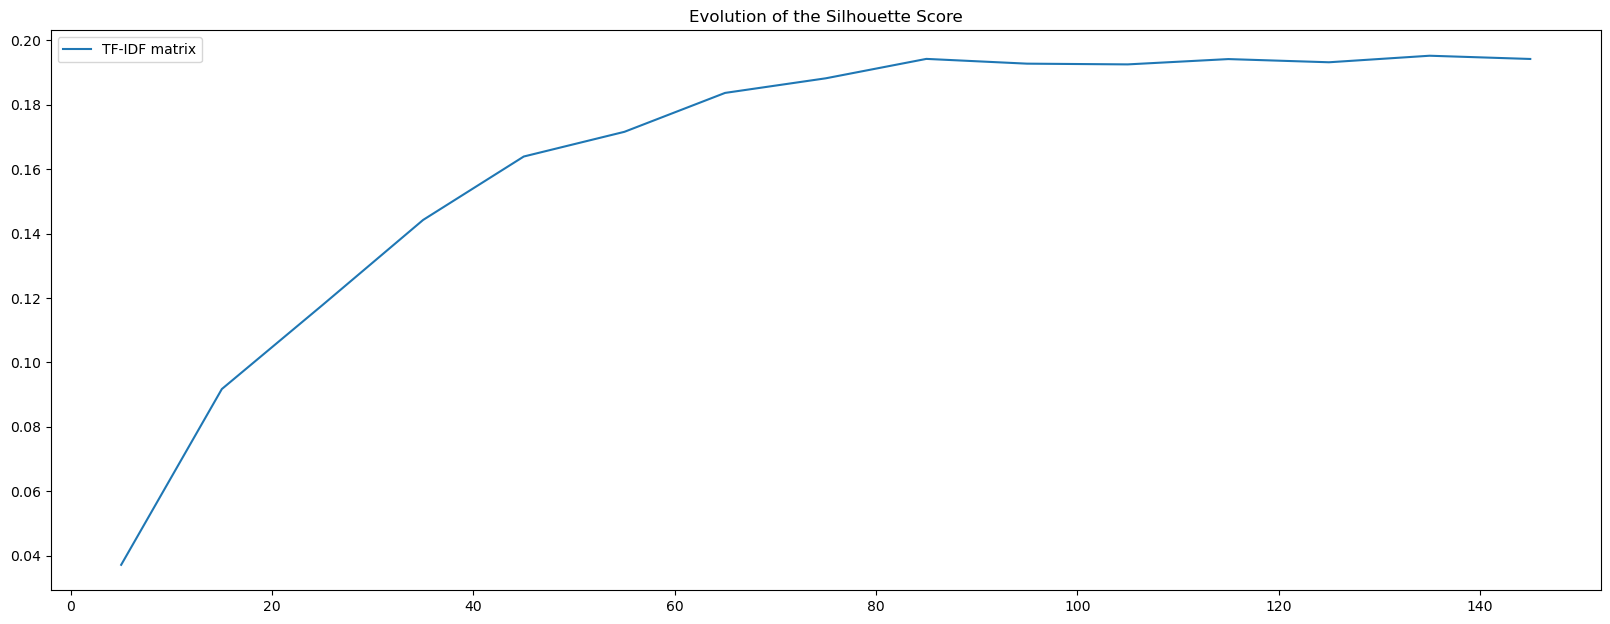

In [203]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

Text(0.5, 1.0, 'ACP with 135 clusters')

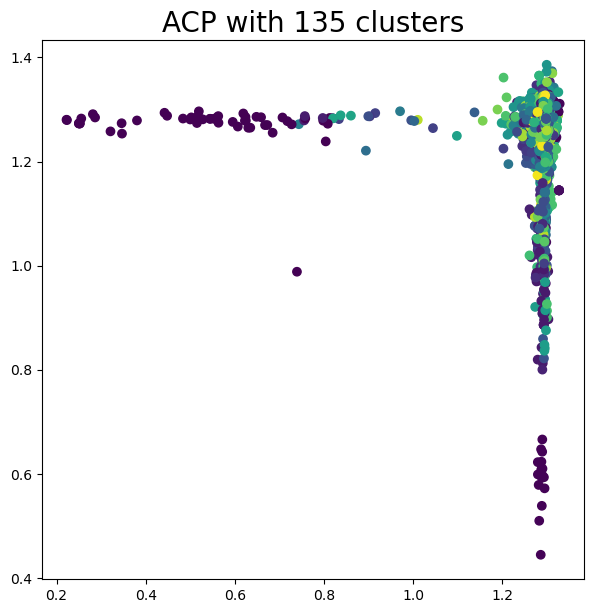

In [204]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(7,7))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

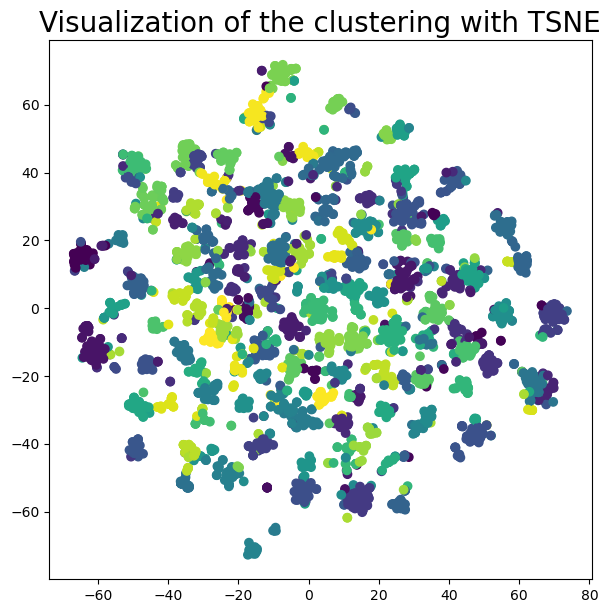

In [205]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(7,7))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

<Figure size 640x480 with 0 Axes>

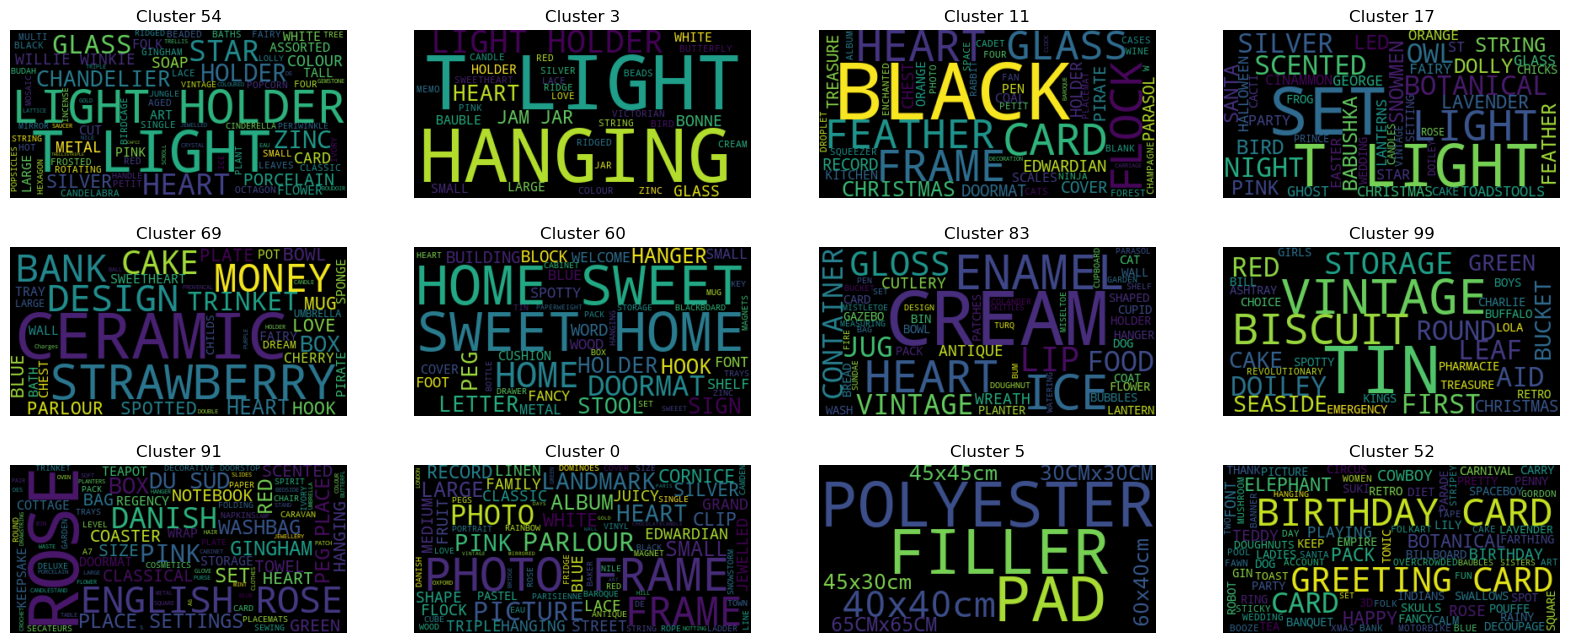

<Figure size 640x480 with 0 Axes>

In [206]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

<Axes: >

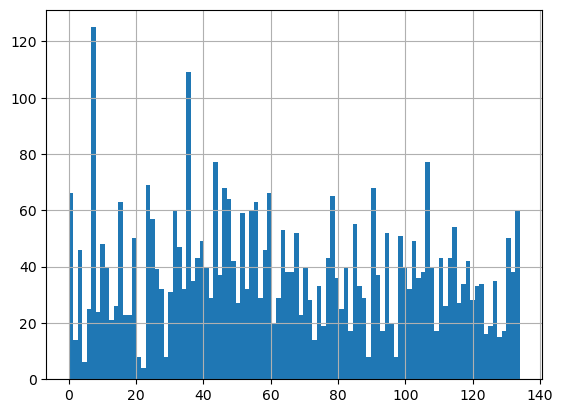

In [207]:
pd.Series(clusters).hist(bins=100)